<a href="https://colab.research.google.com/github/mariepiersbBioinfo/kibio_bi/blob/main/case_2/Demo_case_2_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo case # 2
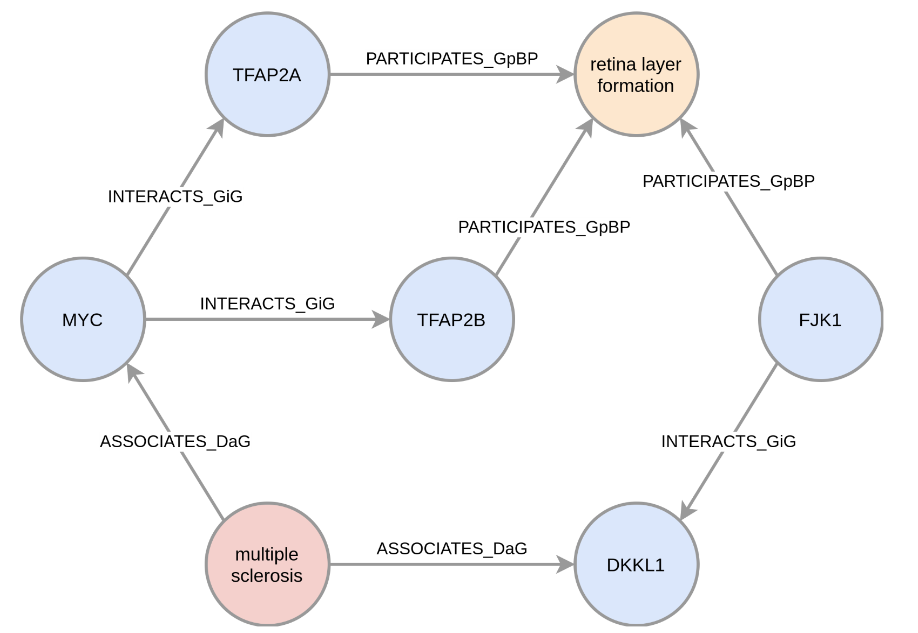

We based our comparison on the Hetionet dataset https://het.io, an integrative network of biomedical knowledge. The Hetionet is a multi-layer graph representing a network of 47031 nodes and 2250197 edges. In this network, nodes can represent different biological entities (for example genes, diseases, molecular functions, or biological processed), while edges can represent different types of interactions (for example disease-gene associations or gene-gene interactions).

## 1.Data preparation

Since Kibana and Superset cannot join dataset, the data need to transformed before importing

### 1.1.Install and import Elasticsearch needed librairies

In [ ]:
!pip install eland==7.14.0b1

import eland as ed
import pandas as pd
from elasticsearch import Elasticsearch, helpers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.9/126.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.


### 1.2.Create Eland dataframe for the needed indexes from http://es.kibio.science

Eland is used to connect to the indexes needed in case 2 via kibio.science server.

In [ ]:
disease_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_disease_201811')
print(f'disease :\nlines = ', disease_ed.shape[0] , ', columns = ', disease_ed.shape[1])

edges_disease_associates_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_disease_associates')
print(f'edges_disease_associates :\nlines = ', edges_disease_associates_ed.shape[0] , ', columns = ', edges_disease_associates_ed.shape[1])

gene_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_gene_201811')
print(f'gene :\nlines = ', gene_ed.shape[0] , ', columns = ', gene_ed.shape[1])

edges_gene_interacts_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_gene_interacts')
print(f'edges_gene_interacts :\nlines = ', edges_gene_interacts_ed.shape[0] , ', columns = ', edges_gene_interacts_ed.shape[1])

edges_gene_participates_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_gene_participates')
print(f'edges_gene_participates :\nlines = ', edges_gene_participates_ed.shape[0] , ', columns = ', edges_gene_participates_ed.shape[1])

biological_process_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_biological_process_201811')
print(f'biological_process :\nlines = ', biological_process_ed.shape[0] , ', columns = ', biological_process_ed.shape[1])

edges_gene_regulates_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_gene_regulates')
print(f'edges_gene_regulates :\nlines = ', edges_gene_regulates_ed.shape[0] , ', columns = ', edges_gene_regulates_ed.shape[1])

compound_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_compound_201811')
print(f'compound :\nlines = ', compound_ed.shape[0] , ', columns = ', compound_ed.shape[1])

edges_compound_binds_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_compound_binds')
print(f'edges_compound_binds :\nlines = ', edges_compound_binds_ed.shape[0] , ', columns = ', edges_compound_binds_ed.shape[1])

disease :
lines =  137 , columns =  17
edges_disease_associates :
lines =  12626 , columns =  6
gene :
lines =  20945 , columns =  17
edges_gene_interacts :
lines =  158583 , columns =  6
edges_gene_participates :
lines =  819199 , columns =  6
biological_process :
lines =  11381 , columns =  11
edges_gene_regulates :
lines =  281983 , columns =  6
compound :
lines =  1552 , columns =  20
edges_compound_binds :
lines =  11734 , columns =  6


### 1.3.Download a copy of the indexes into local Pandas dataframe
The eland.Dataframes are converted to pandas.Dataframe using eland function eland_to_pandas. By doing this, the entire indexes are downloaded locally.

In [ ]:
disease = ed.eland_to_pandas(disease_ed)
print(f'disease :\nlines = ', disease.shape[0] , ', columns = ', disease.shape[1])

edges_disease_associates = ed.eland_to_pandas(edges_disease_associates_ed)
print(f'edges_disease_associates :\nlines = ', edges_disease_associates.shape[0] , ', columns = ', edges_disease_associates.shape[1])

gene = ed.eland_to_pandas(gene_ed)
print(f'gene :\nlines = ', gene.shape[0] , ', columns = ', gene.shape[1])

edges_gene_interacts = ed.eland_to_pandas(edges_gene_interacts_ed)
print(f'edges_gene_interacts :\nlines = ', edges_gene_interacts.shape[0] , ', columns = ', edges_gene_interacts.shape[1])

edges_gene_participates = ed.eland_to_pandas(edges_gene_participates_ed)
print(f'edges_gene_participates :\nlines = ', edges_gene_participates.shape[0] , ', columns = ', edges_gene_participates.shape[1])

biological_process = ed.eland_to_pandas(biological_process_ed)
print(f'biological_process :\nlines = ', biological_process.shape[0] , ', columns = ', biological_process.shape[1])

edges_gene_regulates = ed.eland_to_pandas(edges_gene_regulates_ed)
print(f'edges_gene_regulates :\nlines = ', edges_gene_regulates.shape[0] , ', columns = ', edges_gene_regulates.shape[1])

compound = ed.eland_to_pandas(compound_ed)
print(f'compound :\nlines = ', compound.shape[0] , ', columns = ', compound.shape[1])

edges_compound_binds = ed.eland_to_pandas(edges_compound_binds_ed)
print(f'edges_compound_binds :\nlines = ', edges_compound_binds.shape[0] , ', columns = ', edges_compound_binds.shape[1])

disease :
lines =  137 , columns =  17
edges_disease_associates :
lines =  12626 , columns =  6
gene :
lines =  20945 , columns =  17
edges_gene_interacts :
lines =  158583 , columns =  6
edges_gene_participates :
lines =  819199 , columns =  6
biological_process :
lines =  11381 , columns =  11
edges_gene_regulates :
lines =  281983 , columns =  6
compound :
lines =  1552 , columns =  20
edges_compound_binds :
lines =  11734 , columns =  6


### 1.4.Join the indexes

The way that these database had been indexed to work with most of the BI tools was by splitting edges by the type of nodes and edge e.g., gene_interacts, gene_participates, gene_regulates. Nodes have also been splitted by types e.g., genes, compounds, diseases. 

To look at a specific path, you would have to successively merge all the elements of the path into a data frame.



#### 1.4.1.Example 1

Using the meta-path: Compound–>binds–>Gene–>associates–>Disease, what are the top 3 diseases linked to valproic acid (DB00313) via gene targets

In [ ]:
compound_gene = pd.merge(compound[['@id', 'name']], edges_compound_binds[['@id','@id_to']], on='@id')
compound_gene.columns = ['compound_id', 'compound_name', 'gene_id']

compound_gene_disease = pd.merge(compound_gene, edges_disease_associates[['@id', '@id_to']], left_on='gene_id', right_on='@id_to').drop(['@id_to'], axis=1)
compound_gene_disease.columns = ['compound_id', 'compound_name', 'gene_id', 'disease_id']

compound_gene_disease = pd.merge(compound_gene_disease, disease[['@id','name']], left_on='disease_id', right_on='@id', how='inner').drop(['@id'], axis=1)
compound_gene_disease.columns = ['compound_id', 'compound_name', 'gene_id', 'disease_id', 'disease_name']


#### 1.4.2.Example 2

Perform path analysis to identify gene paths (with a distance of 2 or 3 nodes) between biological processes (retina formation layers) and a specific disease (multiple sclerosis disease)

In [ ]:
disease_gene1 = pd.merge(disease[['@id','name']], edges_disease_associates[['@id','@id_to']], on='@id')
disease_gene1.columns = ['disease_id', 'disease_name', 'gene_1_id']

disease_gene1_gene_2 = pd.merge(disease_gene1, edges_gene_interacts[['@id', '@id_to']], left_on = 'gene_1_id', right_on = '@id').drop(['@id'], axis=1)
disease_gene1_gene_2.columns = ['disease_id', 'disease_name', 'gene_1_id', 'gene_2_id']

disease_gene1_gene_2_process = pd.merge(disease_gene1_gene_2, edges_gene_participates[['@id', '@id_to']], left_on = 'gene_2_id', right_on = '@id').drop(['@id'], axis=1)
disease_gene1_gene_2_process.columns = ['disease_id', 'disease_name', 'gene_1_id', 'gene_2_id', 'process_id']
disease_gene1_gene_2_process = pd.merge(disease_gene1_gene_2_process, biological_process[['@id', 'name']], left_on = 'process_id', right_on = '@id').drop(['@id'], axis=1)
disease_gene1_gene_2_process.columns = ['disease_id', 'disease_name', 'gene_1_id', 'gene_2_id', 'process_id', 'process_name']


## 2.Importation in BI tools

### 2.1Power BI

You can import the indexes in power BI only by copying this script directly into the  **_Get data -> Other -> Python script_** section# Nouvelle section

In [ ]:
import eland as ed
import pandas as pd
import Elasticsearch

disease_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_disease_201811')
edges_disease_associates_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_disease_associates')
gene_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_gene_201811')
edges_gene_interacts_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_gene_interacts')
edges_gene_participates_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_gene_participates')
biological_process_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_biological_process_201811')
edges_gene_regulates_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_gene_regulates')
compound_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_compound_201811')
edges_compound_binds_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_compound_binds')

disease = ed.eland_to_pandas(disease_ed)
edges_disease_associates = ed.eland_to_pandas(edges_disease_associates_ed)
gene = ed.eland_to_pandas(gene_ed)
edges_gene_interacts = ed.eland_to_pandas(edges_gene_interacts_ed)
edges_gene_participates = ed.eland_to_pandas(edges_gene_participates_ed)
biological_process = ed.eland_to_pandas(biological_process_ed)
edges_gene_regulates = ed.eland_to_pandas(edges_gene_regulates_ed)
compound = ed.eland_to_pandas(compound_ed)
edges_compound_binds = ed.eland_to_pandas(edges_compound_binds_ed)


### 2.2.Tableau

If you want to import the indexes in Tableau, you can do it by converting pandas objects in csv files

In [ ]:
!pip install eland==7.14.0b1

import eland as ed
import pandas as pd
from elasticsearch import Elasticsearch, helpers

disease_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_disease_201811')
edges_disease_associates_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_disease_associates')
gene_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_gene_201811')
edges_gene_interacts_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_gene_interacts')
edges_gene_participates_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_gene_participates')
biological_process_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_biological_process_201811')
edges_gene_regulates_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_gene_regulates')
compound_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_compound_201811')
edges_compound_binds_ed = ed.DataFrame(es_client="http://es.kibio.science:80", es_index_pattern='hetionet_edges_compound_binds')


disease = ed.eland_to_pandas(disease_ed)
disease.to_csv("ageingmap.csv")
edges_disease_associates = ed.eland_to_pandas(edges_disease_associates_ed)
edges_disease_associates.to_csv("ageingmap.csv")
gene = ed.eland_to_pandas(gene_ed)
gene.to_csv("ageingmap.csv")
edges_gene_interacts = ed.eland_to_pandas(edges_gene_interacts_ed)
edges_gene_interacts.to_csv("ageingmap.csv")
edges_gene_participates = ed.eland_to_pandas(edges_gene_participates_ed)
edges_gene_participates.to_csv("ageingmap.csv")
biological_process = ed.eland_to_pandas(biological_process_ed)
biological_process.to_csv("ageingmap.csv")
edges_gene_regulates = ed.eland_to_pandas(edges_gene_regulates_ed)
edges_gene_regulates.to_csv("ageingmap.csv")
compound = ed.eland_to_pandas(compound_ed)
compound.to_csv("ageingmap.csv")
edges_compound_binds = ed.eland_to_pandas(edges_compound_binds_ed)
edges_compound_binds.to_csv("ageingmap.csv")



### 2.3.Kibana, Siren and Superset

#### 2.3.1. Importation by csv file

You can download the joined dataframe from the "_Data preparation_" section in csv format and upload it directly in the tool. 

**Kibana** : https://www.elastic.co/fr/blog/importing-csv-and-log-data-into-elasticsearch-with-file-data-visualizer

**Siren** : https://docs.siren.io/siren-platform-user-guide/11.1/siren-investigate/data-import.html#_importing_data_from_excel_and_csv_files

**Superset** : https://superset.apache.org/docs/creating-charts-dashboards/exploring-data/#loading-csv-data

In [ ]:
###For example 1
compound_gene_disease.to_csv("compound_gene_disease.csv")

###For example 2
disease_gene1_gene_2_process.to_csv("disease_gene1_gene_2_process.csv")


2.3.2. Importation in Elasticsearch
You can also upload the joined dataframe from the "Data preparation" section directly in Elasticsearch with this function. For this to work, you need to execute this locally on the same computer where you installed your Elasticsearch instance.*texte en italique*

## 3.Resolving the case study with python

You can analyze this case using python to compare with the results you got with BI tools. Just apply the filters needed on the results objects of the "_Data preparation_" section.

### 3.1.Example 1

Using the meta-path: Compound–>binds–>Gene–>associates–>Disease, what are the top 3 diseases linked to valproic acid (DB00313) via gene targets

In [ ]:
compound_gene_disease = compound_gene_disease.query('compound_name == "Valproic Acid"').groupby(['disease_name'],as_index=False).agg({'gene_id': lambda x: x.tolist()})
compound_gene_disease['num_of_genes'] = compound_gene_disease['gene_id'].str.len()

answer_question_2 = compound_gene_disease.sort_values(by=['num_of_genes'], ascending=False).head(n=3)

answer_question_2

### 3.1.Example 2

Perform path analysis to identify gene paths (with a distance of 2 or 3 nodes) between biological processes (retina formation layers) and a specific disease (multiple sclerosis disease)

In [ ]:
answer_question_3 = disease_gene1_gene_2_process.query('disease_name == "multiple sclerosis" and process_name == "retina layer formation"')

answer_question_3

NameError: ignored